# Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import scipy.stats as stat
import seaborn as sns
sns.set()

# Loading Raw Data

In [2]:
raw_data = pd.read_csv('1.04.+Real-life+example.csv')

# Pre Processing

## Exploring descriptive statistics of the variables

In [3]:
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [4]:
raw_data.describe(include='all')

# Recognizing which variables are numerical can be seen in the table below
## Price, Mileage, EngineV, Year
# Categorical variables are easily identifiable where statistics aren't shown
## Brand, Body, Engine Type, Registration, Model

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [5]:
# For this illustration, drop Model (as basis)
raw_data = raw_data.drop('Model', axis = 1)

## Dealing with null values

In [6]:
# Let's take a look at our numerical variables - Price, Mileage, EngineV, Year
# Assess whether we have null data in these variables (and drop when we detect them)

raw_data[['Price','Mileage', 'EngineV', 'Year']].isnull().sum()

# Only Price & EngineV shown to have some records of missing or null values
# Drop them from our DataFrame

raw_data = raw_data.dropna(subset = ['Price','EngineV'], axis = 0)

## Exploring PDFs

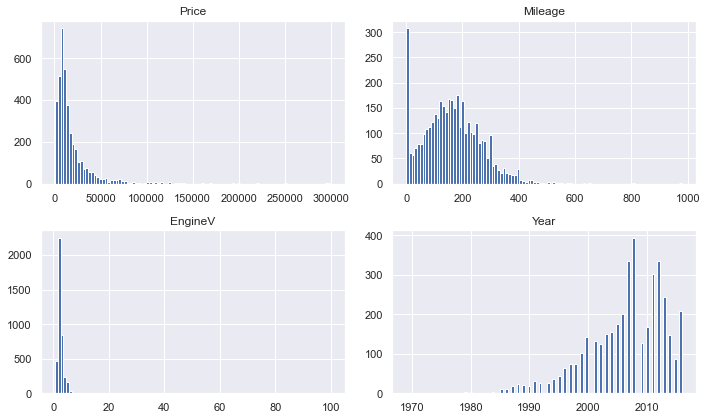

In [7]:
# Exploring the PDFs of each variables will help us to determine whether we have
# any extremities our outliers in our dataset
# This is also where we will determine to remove the outliers
# The goal is to check whether we have a fairly distributed dataset for our variables

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols= 2, figsize = (10,6))

ax1.hist(raw_data['Price'], bins = 100)
ax1.set_title('Price')

ax2.hist(raw_data['Mileage'], bins = 100)
ax2.set_title('Mileage')

ax3.hist(raw_data['EngineV'], bins = 100)
ax3.set_title('EngineV')

ax4.hist(raw_data['Year'], bins = 100)
ax4.set_title('Year')

plt.tight_layout()
plt.show()

# Observations on the distributions of the data
# All of these 4 variables have exhibited some skewness
# Let's assess each of the variables one at a time

## Dealing with Outliers

count      4025.000000
mean      19552.308065
std       25815.734988
min         600.000000
25%        6999.000000
50%       11500.000000
75%       21900.000000
max      300000.000000
Name: Price, dtype: float64


price_q3
              Brand     Price
2430         Toyota   21950.0
4213         Toyota   21999.0
2090         Toyota   21999.0
1554  Mercedes-Benz   21999.0
3092         Toyota   21999.0
...             ...       ...
2243  Mercedes-Benz  250000.0
4101  Mercedes-Benz  295000.0
3164  Mercedes-Benz  295000.0
4318  Mercedes-Benz  300000.0
1728  Mercedes-Benz  300000.0

[999 rows x 2 columns]
               Price
count     999.000000
mean    49480.066987
std     37617.126528
min     21950.000000
25%     27500.000000
50%     36000.000000
75%     55527.500000
max    300000.000000


price_q3_q3
              Brand    Price
2430         Toyota  21950.0
4213         Toyota  21999.0
2090         Toyota  21999.0
1554  Mercedes-Benz  21999.0
3092         Toyota  21999.0
...             

C:\Users\QS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

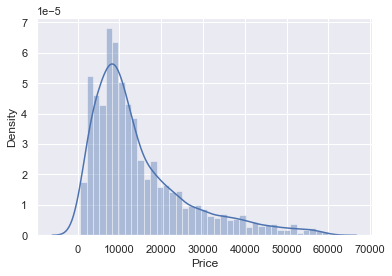

In [8]:
# Price
## Skew to the right
## This means that the mean > median
## Looking at the x-axis, the highest recorded is $300,000
## This seems excessive given that we are looking a probable way to assess the price of used car
## Based on a google search, a typical average car price is around $28,000 based on the data in 2021

print(raw_data['Price'].describe())
print('\n')

# Statistics below shows that there seems to be huge difference between 3rd quantile and the maximum
# 3rd quantile seems very probable to be the usual price for 2nd hand cars
# Let's take a look at the values above this quantile

q3 = raw_data['Price'].quantile(0.75)

# filtering the prices of car that is above the 3rd quantile shows the brand and its model

price_q3 = raw_data[raw_data['Price'].values > q3].sort_values('Price')[['Brand', 'Price']]
print('price_q3')
print(price_q3)
print(price_q3.describe())
print('\n')

# It is observed that Mercedes-Benz are the most expensive for 2nd hand cars
# Question is, what do we know about these prices and Mercedes-Benz?
# According to google search the price is currently ranging from $8,800 to $75,000
# Therefore, it is wise to drop this from our raw_data
# What about other prices? Let's take a look at 3rd quantile again but this time from our filtered data below q3

q3_q3 = price_q3['Price'].quantile(0.75)
price_q3_q3 = price_q3[price_q3['Price'].values < q3_q3].sort_values('Price')[['Brand','Price']]
print('price_q3_q3')
print(price_q3_q3)
print(price_q3_q3.describe())

# Now it starts to make sense about these prices below $60,000
# For example, a simple google search shows that BMW X5 typical 2nd hand prices ranging from $39,590 to $63,990


# Conclusion, drop extreme values that is above $60,000 based on the findings above

data_1 = raw_data[raw_data['Price'] < 60000]
sns.distplot(data_1['Price'])


count    3800.000000
mean      171.821316
std        99.029069
min         0.000000
25%       102.000000
50%       164.000000
75%       235.000000
max       810.000000
Name: Mileage, dtype: float64


              Brand  Year  Mileage
3945            BMW  2016        0
2267        Renault  2016        0
2899     Volkswagen  2016        0
1037  Mercedes-Benz  2016        0
3967     Volkswagen  2016        0
...             ...   ...      ...
1813  Mercedes-Benz  1998      630
3222  Mercedes-Benz  2005      650
3457     Volkswagen  1999      650
3091     Volkswagen  2013      800
3625         Toyota  2010      810

[3800 rows x 3 columns]
              Brand  Year  Mileage
3945            BMW  2016        0
2267        Renault  2016        0
2899     Volkswagen  2016        0
1037  Mercedes-Benz  2016        0
3967     Volkswagen  2016        0
...             ...   ...      ...
628   Mercedes-Benz  2012       12
2225  Mercedes-Benz  2013       12
38             Audi  2014       14
3298 

C:\Users\QS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

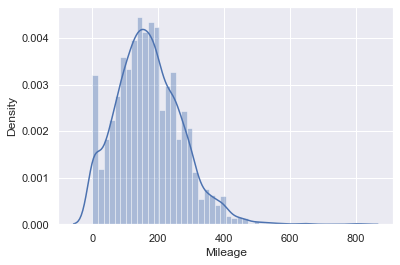

In [9]:
# Mileage
## At first glance, it may seemed that the peak detected on the left suggest we have outliers
## But how true this is?

print(data_1['Mileage'].describe())
print('\n')

# Statistics below shows that there seems that some of the cars have never been driven below
# as indicated by the total mileage
# let's take a look at these cars

mile = data_1[['Brand', 'Year', 'Mileage']].sort_values('Mileage')
print(mile)
print(mile.head(200))
print(mile.tail(200))
print('\n')

# Data seems to suggest that some of the cars that haven't been driven below are relatively new
# Although, we've seen that some of the older cars such as Audi A6 from 1998 have low mileage as well
# Very unlikely that these cars to have such a low mileage
# However, we will keep this in our testing as there is no discernable way to differentiate
# type and age of the cars and the miles it had accumulate

sns.distplot(data_1['Mileage'])

count    3800.000000
mean        2.712368
std         5.066968
min         0.600000
25%         1.800000
50%         2.000000
75%         3.000000
max        99.990000
Name: EngineV, dtype: float64


count    3541.000000
mean        2.451392
std         0.871475
min         1.460000
25%         1.900000
50%         2.200000
75%         3.000000
max         6.000000
Name: EngineV, dtype: float64




C:\Users\QS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

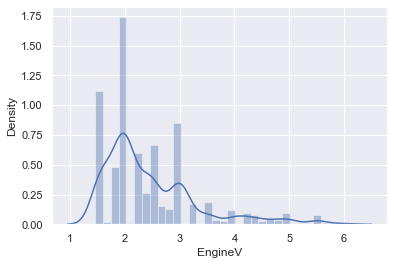

In [10]:
# Engine
## Skew to the right
## This means that the mean > median
## Looking at the x-axis, the highest recorded is 99.9
## and the differences between the 75% and maximum seems very high

print(data_1['EngineV'].describe())
print('\n')

## A google search shows that type of cars and its respective range of engine volumes:
## Compact cars: typically have engines with a displacement of around 1.4 to 2.0 liters, with some models having engines as small as 1.0 liter.
## Midsize cars: typically have engines with a displacement of around 2.0 to 2.5 liters, with some models having larger engines up to 3.5 liters.
## Full-size cars: typically have engines with a displacement of 3.5 to 5.0 liters, with some luxury models having even larger engines.
## Sports cars: typically have engines with a displacement of 2.0 to 6.0 liters, with high-performance models having engines up to 8.0 liters or more.
## SUVs and crossovers: typically have engines with a displacement of 2.0 to 3.5 liters for smaller models, with larger models having engines up to 6.0 liters or more.
## Pickup trucks: typically have engines with a displacement of 2.7 to 6.2 liters, with heavy-duty models having even larger engines.
## Based on the description above, we can take 6.2 as our maximum and 1.4 as our minimum

data_2 = data_1[(data_1['EngineV'] > 1.4 )& (data_1['EngineV'] < 6.2)]
print(data_2['EngineV'].describe())
print('\n')

sns.distplot(data_2['EngineV'])

count    3541.000000
mean     2005.796103
std         6.512153
min      1969.000000
25%      2002.000000
50%      2007.000000
75%      2011.000000
max      2016.000000
Name: Year, dtype: float64


              Brand    Price  Year
906             BMW   4700.0  1990
3906     Mitsubishi   1550.0  1990
2386     Volkswagen   2900.0  1990
812             BMW   3650.0  1990
2324            BMW   3499.0  1990
...             ...      ...   ...
2122  Mercedes-Benz   2990.0  1979
288          Toyota    600.0  1979
4319  Mercedes-Benz   5500.0  1978
1025  Mercedes-Benz   2300.0  1978
810   Mercedes-Benz  34999.0  1969

[100 rows x 3 columns]


              Brand     Price  Year
4270     Volkswagen  10000.00  2015
4080     Volkswagen  12114.35  2016
2899     Volkswagen  13300.95  2016
3387        Renault  13300.95  2016
3285        Renault  13321.33  2016
...             ...       ...   ...
362      Volkswagen  55500.00  2016
1150            BMW  56500.00  2016
3630  Mercedes-Benz  57000.00  20

C:\Users\QS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

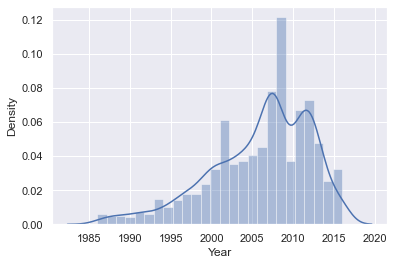

In [11]:
# Year
## Skew to the left
## This means that the median > mean
 
print(data_2['Year'].describe())
print('\n')

## Looking at the x-axis, the oldest car listed for sale is 1969
## Let's take a a look these cars

year = data_2[['Brand','Price','Year']].sort_values('Year')

print(year.head(100).sort_values('Year', ascending=False))
print('\n')
print(year.tail(100).sort_values('Price', ascending=True))

# The newer cars seems to make sense but the oldest car listed is Mercedes-Benz S 280
# priced at $ 39000, which is relatively high for this car
# But other older cars seems to show reasonable price, given its brand (premium or continental)

# Conclusion, we will drop below 0.5% quantile below 
q = data_2['Year'].quantile(0.005)
data_3 = data_2[data_2['Year']>q]

sns.distplot(data_3['Year'])


## Resetting the index

In [12]:
data_cleaned = data_3.reset_index(drop=True)
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3510,Renault,6800.0,sedan,152,1.6,Petrol,yes,2007
3511,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3512,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3513,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


In [13]:
data_cleaned.describe(include='all')

# Summary below shows that we have successfully drop missing values
# and the total number of records are consistent throughout all of the variables

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3515,3515.000000,3515,3515.000000,3515.000000,3515,3515,3515.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,751,NaN,1398,NaN,NaN,1694,3161,NaN
mean,NaN,14946.109923,NaN,174.979801,2.454020,NaN,NaN,2005.969844
std,NaN,11766.968421,NaN,98.777801,0.872997,NaN,NaN,6.205429
min,NaN,800.000000,NaN,0.000000,1.460000,NaN,NaN,1986.000000
25%,NaN,6970.000000,NaN,106.000000,1.900000,NaN,NaN,2002.000000
50%,NaN,11000.000000,NaN,168.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,19696.040000,NaN,238.000000,3.000000,NaN,NaN,2011.000000


# OLS Assumptions

Text(0, 0.5, 'Price')

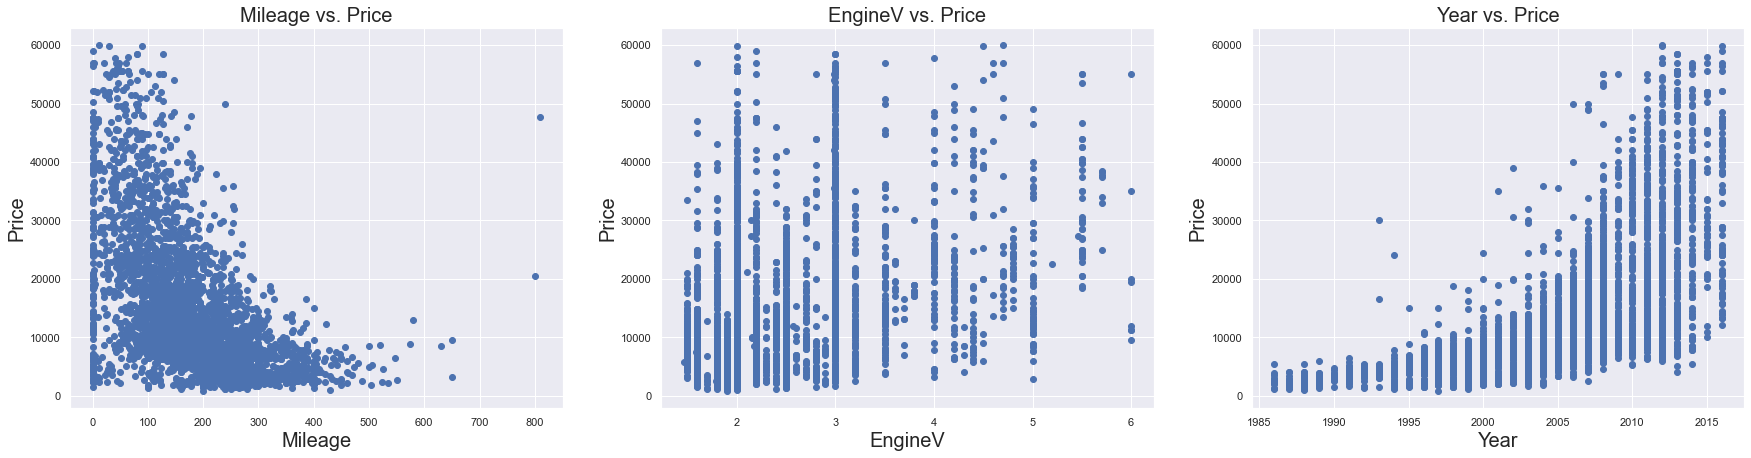

In [14]:
# One of the ways to verify whether it abides the OLS assumptions is to identify some linearity between the variables and the dependent variables
# The assumptions are as follows:
## Linearity
## No endogeneity
## Normality and Homoscedasticity
## No autocorrelation
## No multicollinearity

# One of the methods to identify linearity is to plot PDFs of each variables against the target variable
## Mileage
## EngineV
## Year

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols= 3, figsize = (30,7))

ax1.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax1.set_title('Mileage vs. Price', fontsize = 20)
ax1.set_xlabel('Mileage', fontsize = 20)
ax1.set_ylabel('Price', fontsize = 20)

ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('EngineV vs. Price', fontsize = 20)
ax2.set_xlabel('EngineV', fontsize = 20)
ax2.set_ylabel('Price', fontsize = 20)

ax3.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax3.set_title('Year vs. Price', fontsize = 20)
ax3.set_xlabel('Year', fontsize = 20)
ax3.set_ylabel('Price', fontsize = 20)

# In all of these observations, we can deduce that both Mileage and Year are showing
# negative exponential curve while EngiveV exhibits a positive exponential curve
# in respect to Year. Therefore, Year is exponentially distributed amongst of all of these
# variables

# Another we could interpret this is the error term is also increasing exponentially as
# the price is getting increasingly bigger
# This, in fact, will invalidate the OLS assumptions

## Transformation

In [15]:
# Since the linear regression model calls for OLS assumptions to be validated,
# we need to relax the assumption by transforming the target variable
# In this case, we need to log transform it to make it the relationship between
# each of the variables to be in linear

log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price

Text(0, 0.5, 'Log Price')

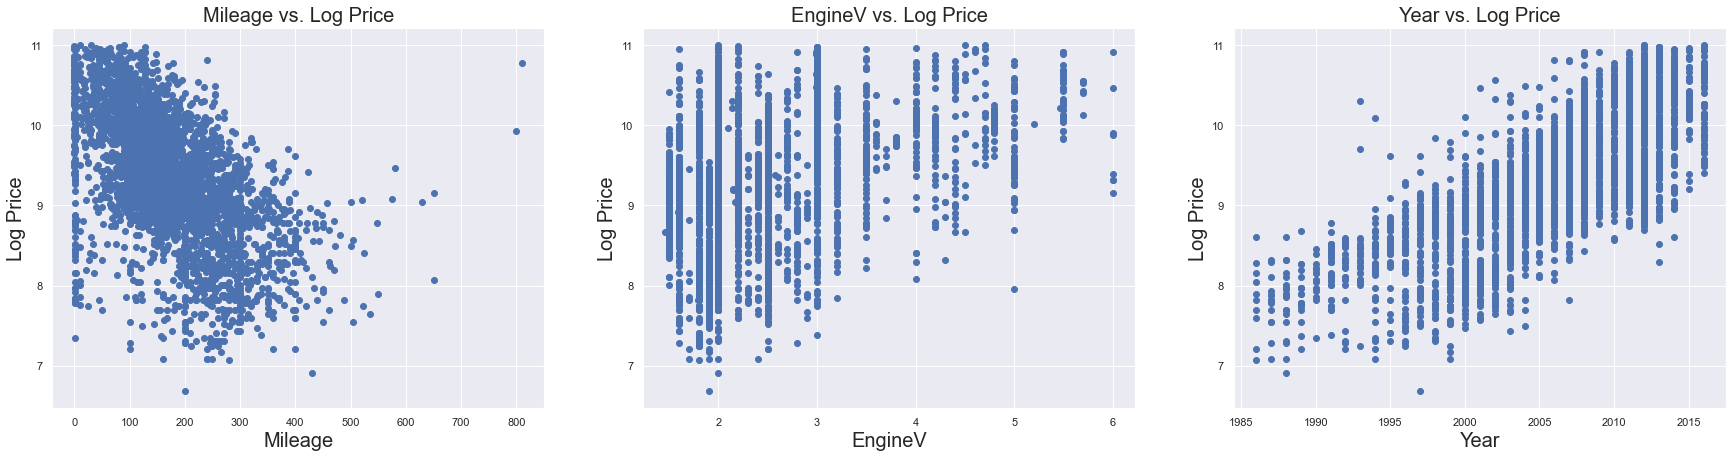

In [16]:
# Plot the same PDFs will yield a different result

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols= 3, figsize = (30,7))

ax1.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax1.set_title('Mileage vs. Log Price', fontsize = 20)
ax1.set_xlabel('Mileage', fontsize = 20)
ax1.set_ylabel('Log Price', fontsize = 20)

ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('EngineV vs. Log Price', fontsize = 20)
ax2.set_xlabel('EngineV', fontsize = 20)
ax2.set_ylabel('Log Price', fontsize = 20)

ax3.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax3.set_title('Year vs. Log Price', fontsize = 20)
ax3.set_xlabel('Year', fontsize = 20)
ax3.set_ylabel('Log Price', fontsize = 20)

# We have now relaxed the assumptions, we are effectively assuming that
# Price has a linear relationship with the said variables
# and the error term seems to be afixxed to the upper and lower bounds

## Multicollinearity

Text(0, 0.5, 'Year')

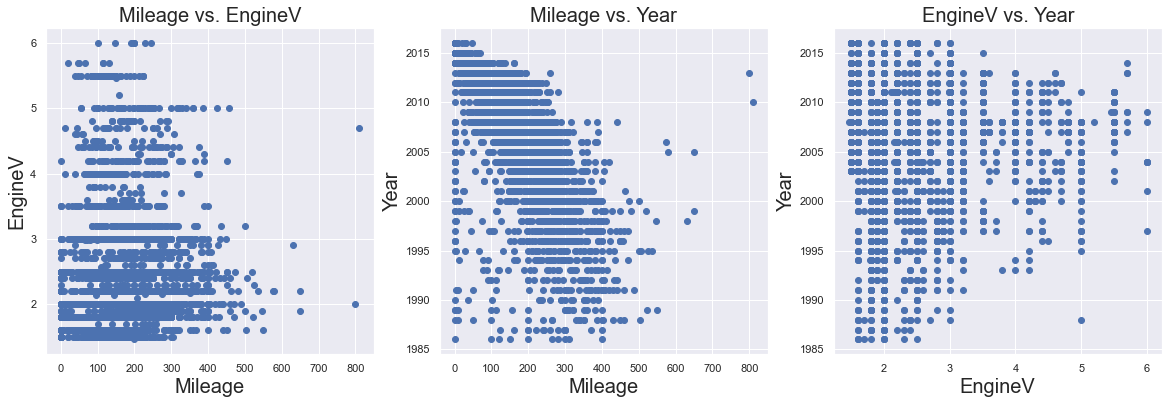

In [17]:
# We need to check multicollinearity
# This is to find if we have an existing correlation between all of our independent variables
# If so, we can have the estimated regression coefficients that are large and unpredictable,
# leading to unreliable inferences 

## A simple scatter plot of each combinations (without repititions) for Mileage, EngineV and Year

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols= 3, figsize = (20,6))

ax1.scatter(data_cleaned['Mileage'], data_cleaned['EngineV'])
ax1.set_title('Mileage vs. EngineV', fontsize = 20)
ax1.set_xlabel('Mileage', fontsize = 20)
ax1.set_ylabel('EngineV', fontsize = 20)

ax2.scatter(data_cleaned['Mileage'], data_cleaned['Year'])
ax2.set_title('Mileage vs. Year', fontsize = 20)
ax2.set_xlabel('Mileage', fontsize = 20)
ax2.set_ylabel('Year', fontsize = 20)

ax3.scatter(data_cleaned['EngineV'], data_cleaned['Year'])
ax3.set_title('EngineV vs. Year', fontsize = 20)
ax3.set_xlabel('EngineV', fontsize = 20)
ax3.set_ylabel('Year', fontsize = 20)

# Observations of the scatter plot seems to be unclear at the moment but Year has some kind
# of linear relationship with Mileage and EngineV?

In [18]:
## Another method we could try is through its pearson's correlation

variables = data_cleaned[['Mileage', 'EngineV', 'Year']]
corr_matrix = variables.corr()
print(corr_matrix)

# As expected, Year seems to display a ratio of 1, which seems to suggest there can be
# linearity with the others

         Mileage   EngineV      Year
Mileage  1.00000  0.042740 -0.664800
EngineV  0.04274  1.000000 -0.054834
Year    -0.66480 -0.054834  1.000000


In [19]:
## Variance Inflation Factor
# Create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

vif

# Yet again, Year has the highest VIF amongst all
# But, I will choose to not to drop it since we can assume that this can be ignored
# Because having Year is significant besides mileage when we are determining the age of the car
# Year and Mileage are closely related but most doesn't necessarily mean it correlates linearly
# For example, newer cars can have higher mileage and older cars can have much lower mileage


,VIF,Features
0,4.118634,Mileage
1,8.916096,EngineV
2,11.546626,Year


# Dummy Data

In [43]:
# Next, we need to encode some numerical representation onto the categorical data
# We need to include the argument to drop the first column as to avoid dummy variable trap

data_cleaned = pd.get_dummies(data_cleaned, drop_first = True)

# Re-call that categorical variables are those object type
category = raw_data.describe(include = 'object')
print(category.columns.values)

data_cleaned.columns.values

['Brand' 'Body' 'Engine Type' 'Registration']


array(['Price', 'Mileage', 'EngineV', 'Year', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [21]:
# Re-arrange them to make sure that all of the dependent variables are arranged from the LHS
# whereas the target variable would be on the end of the RHS

cols = ['Mileage', 'EngineV', 'Year', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes', 'Price', 'log_price']

data_cleaned_final = data_cleaned[cols]                        

# Feature Selection (multivariate t test)

In [22]:
# Declare input(s) and output variables

y = data_cleaned_final['log_price']
x = data_cleaned_final.drop(['log_price', 'Price'], axis = 1)

In [23]:
# Create a scaler object
Scaler = StandardScaler()

# Fit the inputs where it will calculate the mean and the std. dev
Scaler.fit(x)

# Scale the inputs
x = Scaler.transform(x)

In [24]:
class feature_selection_linreg(LinearRegression):
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True, n_jobs=1):
        super().__init__(fit_intercept=fit_intercept, normalize=normalize, copy_X=copy_X, n_jobs=n_jobs)
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs

    def fit(self, X, y):
        self = super().fit(X, y)
        # calculate SSE (sum of squared errors) and SE (standard error)
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])
        # compute the t-statistic for each feature
        self.t = self.coef_ / se
        # find the p-value for each feature
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self


In [25]:
# When we create the regression everything is the same
reg_with_pvalues = feature_selection_linreg()
reg_with_pvalues.fit(x,y)

feature_selection_linreg()

In [26]:
# The difference is that we can check what's contained in the local variable 'p' in an instance of the LinearRegression() class
reg_with_pvalues.p

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.37695496e-03,
       7.43408973e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.95887842e-09, 5.09379102e-03,
       8.82176554e-11, 0.00000000e+00])

In [44]:
# Let's create a new data frame with the names of the features
reg_p_test = pd.DataFrame(data_cleaned.drop(['log_price','Price'], axis = 1).columns.values ,columns =['Features'])

# Finally, we add the p-values we just calculated
reg_p_test['p-values'] = reg_with_pvalues.p

# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999

reg_p_test.sort_values('p-values')

,Features,p-values
0,Mileage,0.00
13,Body_van,0.00
12,Body_vagon,0.00
11,Body_sedan,0.00
10,Body_other,0.00
9,Body_hatch,0.00
7,Brand_Toyota,0.00
8,Brand_Volkswagen,0.00
5,Brand_Mitsubishi,0.00
2,Year,0.00


In [ ]:
# Filtering out those of the p-values that exceeds the alpha 0.05

above_alpha = reg_p_test[['Features','p-values']][reg_p_test['p-values'] > 0.05]
print(above_alpha)

# As you can see, we have 7 categorical data that seems to have little or zero explanotary power
# to the Price of the used car
# It is interesting to note that we have 3 models that indicated p values of higher than alpha 0.05
# And 4 types of bodies as well
# Intepreting these weights of the 7 regressors, does this mean that there isn't
# enough statistical evidence that it is not statistically significant than 0?

# Let's proceed dropping these variables 

data_cleaned_final = data_cleaned_final.drop(above_alpha['Features'].values, axis = 1)

# Linear Regression

In [30]:
# Declare input(s) and output variables

target = data_cleaned_final['log_price']
inputs = data_cleaned_final.drop(['log_price', 'Price'], axis = 1)

## Scaling 

In [31]:
# Perform standard scaling to normalize the variables 
# and we want ta similar standardized impact to the model
# We will use standardization for this method

# Create a scaler object
Scaler = StandardScaler()

# Fit the inputs where it will calculate the mean and the std. dev
Scaler.fit(inputs)

# Scale the inputs
inputs_scaled = Scaler.transform(inputs)

## Train-Test Split

In [32]:
# Split the variables with an 80-20 split and some random state
# To have the same split as , use random_state = 365

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size = 0.2, random_state = 365)

## Create Regression

In [33]:
# Create Linear Regression

reg = LinearRegression()

# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

# Evaluate the model using the same x_train
y_hat = reg.predict(x_train)

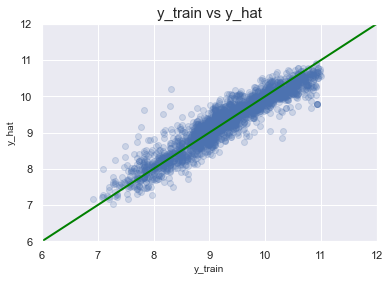

C:\Users\QS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals in PDF')

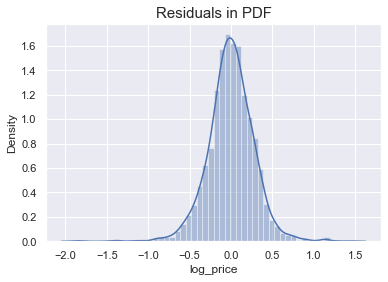

In [34]:
## Compare the y_train (target) and y_hat (predict) by plotting a scatterplot
# The closer the points to the 45 degrees line, the better
plt.scatter(y_train, y_hat, alpha = 0.2)

x_line = range(0,13)
y_line = range(0,13)
plt.plot(x_line, y_line, color = 'green', linewidth = 2)

plt.xlabel('y_train', fontsize = 10)
plt.xlim(6,12)

plt.ylabel('y_hat', fontsize = 10)
plt.ylim(6,12)

plt.title('y_train vs y_hat', fontsize = 15)
plt.show()

# Based on this observation below, the points predicted are almost identical or matching 
# with some (residuals) are over or under estimating the outcome

## Plotting residuals in PDF
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)
plt.title('Residuals in PDF', fontsize = 15)

# Again, the plot seems to show some pattern of normally distributed

In [35]:
## Evaluating the R2 (and the R2 adjusted)
# R2
r2 = reg.score(x_train, y_train)
print(r2)


# R2 adjusted
# n = number of total sample size
# k = number of variables
n = inputs_scaled.shape[0]
k = inputs_scaled.shape[1]
r2_adj = 1-(1-r2)*((n-1)/(n-k-1))
print(r2_adj)

# Coefficient (weights)
coef = reg.coef_

# y-intercept (bias)
intercept = reg.intercept_

# What this means is that the R2 adjusted does not differ much from R2

0.8785329870725809
0.8779424983051327


## Summary (Weights and Bias)

In [36]:
# Finding the weights and bias (and summarizes them in a table)
reg_summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary['Weights'] = coef
reg_summary = reg_summary.append({'Bias': intercept}, ignore_index = True)

# We have introduced the dummy variables
# Re-call that we remove the 1st column and the 1st column being the referrence category data
# We will know which category is the benchmark for each category
cat = raw_data.drop(['Price','Mileage','EngineV','Year'], axis = 1)
cat_Brand = np.unique(np.array(cat['Brand']))
cat_Brand

for i in cat:
    print(i)
    print(np.unique(np.array(cat[i])))
# {"Brand": "Audi", "Body":"crossover", "Engine Type": "Diesel", ...} are labelled as the 1st column



Brand
['Audi' 'BMW' 'Mercedes-Benz' 'Mitsubishi' 'Renault' 'Toyota' 'Volkswagen']
Body
['crossover' 'hatch' 'other' 'sedan' 'vagon' 'van']
Engine Type
['Diesel' 'Gas' 'Other' 'Petrol']
Registration
['no' 'yes']


In [37]:
print(reg_summary.describe(include='all'))

# As observed in the summary, we have maximum weight and minimum weight

print('\n')
print(reg_summary.max())
print(reg_summary.min())
print('\n')

# Year having the most extreme weight whereas Body_hatch has the least extreme weight
# As expected, high VIF tends to translate into higher weights of the regressor
# But, we decided to keep the Year as we want to have this significance of the weight into our prediction model

# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999

reg_summary
# Summary of 300 feautes (+ dummy variables) with its the weights paired


       Features    Weights      Bias
count        17  17.000000  1.000000
unique       17        NaN       NaN
top     Mileage        NaN       NaN
freq          1        NaN       NaN
mean        NaN  -0.009486  9.317505
std         NaN   0.175047       NaN
min         NaN  -0.182907  9.317505
25%         NaN  -0.097747  9.317505
50%         NaN  -0.063715  9.317505
75%         NaN  -0.013004  9.317505
max         NaN   0.508572  9.317505


Weights    0.508572
Bias       9.317505
dtype: float64
Weights   -0.182907
Bias       9.317505
dtype: float64




C:\Users\QS\AppData\Local\Temp/ipykernel_1444/1174482620.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(reg_summary.max())
C:\Users\QS\AppData\Local\Temp/ipykernel_1444/1174482620.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(reg_summary.min())


,Features,Weights,Bias
0,Mileage,-0.063715,NaN
1,EngineV,0.184473,NaN
2,Year,0.508572,NaN
3,Brand_BMW,0.026086,NaN
4,Brand_Mitsubishi,-0.120910,NaN
5,Brand_Renault,-0.182907,NaN
6,Brand_Toyota,-0.052578,NaN
7,Brand_Volkswagen,-0.088443,NaN
8,Body_hatch,-0.070318,NaN
9,Body_other,-0.074886,NaN


# Testing the model

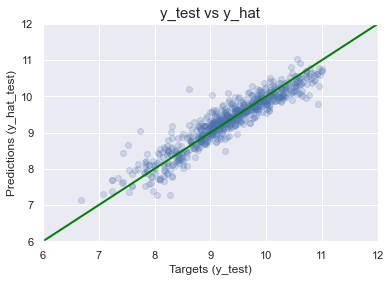

C:\Users\QS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals in PDF')

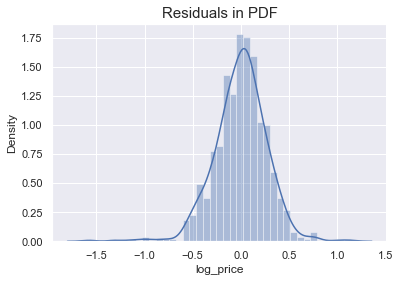

In [38]:
# We need to test our model algorithm with the data that it has never seen
# Remember that we split our data?
y_hat_test = reg.predict(x_test)

# Create a scatter plot with the test target and the test prediction
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_test, y_hat_test, alpha = 0.2)

x_line = range(0,13)
y_line = range(0,13)
plt.plot(x_line, y_line, color = 'green', linewidth = 2)

plt.xlabel('Targets (y_test)',size=12)
plt.xlim(6,12)

plt.ylabel('Predictions (y_hat_test)',size=12)
plt.ylim(6,12)

plt.title('y_test vs y_hat', fontsize = 15)
plt.show()

## Plotting residuals in PDF
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_test - y_hat_test)
plt.title('Residuals in PDF', fontsize = 15)


In [39]:
# Matching the prediction with the actual (comparison)
# Create a new dataset containing both the inputs and the observations
# First, let's do about the predicted value
result = pd.DataFrame(np.exp(y_hat_test), columns = ['Predicted'])

# Second, let's do about the observed value
# Re-call that we split our dataset, it preserves the old index
# Therefore, we have to reset the index of the data frame of the actual (y_test)
y_test = y_test.reset_index(drop = True)
result['Observed'] = np.exp(y_test)

In [42]:
# Finding residuals through plotting them would help us to visualize it
# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals)
result ['Residuals'] = result['Predicted'] - result['Observed']
result ['%Diff.'] = np.absolute(result['Residuals']/result['Observed']*100)

# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999

# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Describing the summary
print(result.describe())
print('\n')

# Finally, we sort by difference in % (or the price) to see any sort of trend
print(result.sort_values(by=['Observed']))
print('\n')

# Filter out %Diff. abovde 100
print(result[result['%Diff.'] > 100])
print('\n')
print(result[result['%Diff.'] > 100].count())
print('\n')

# Describing our regression regressors weights and bias
print(reg_summary)

# Conclusion

## If we compare this to our exericse, this significantly imporove the model
## From R2 of 0.744 to 0.877 (R2 adjusted)
## The mean of diff. is also significantly lower and there is a chance
## that we slightly overestimate, espeically when on the lower ranges of the Prices

## In terms of predicting the model, the residuals does not differ much from the training sets

## Let's do better by introducing models...

       Predicted  Observed  Residuals  %Diff.
count     703.00    703.00     703.00  703.00
mean    14348.85  14992.86    -644.01   21.52
std      9782.25  11777.55    4989.55   26.39
min      1246.26    800.00  -37708.48    0.01
25%      7240.43   6925.00   -1715.74    7.49
50%     11767.45  11000.00     -68.99   15.53
75%     19375.06  19700.00    1434.69   27.76
max     62141.00  59900.00   23641.00  384.52


     Predicted  Observed  Residuals  %Diff.
680    1246.26    800.00     446.26   55.78
559    1483.43   1180.00     303.43   25.71
298    2179.78   1400.00     779.78   55.70
458    2184.38   1400.00     784.38   56.03
498    1601.85   1400.00     201.85   14.42
401    2320.22   1550.00     770.22   49.69
164    1999.53   1650.00     349.53   21.18
618    2058.32   1700.00     358.32   21.08
94     4576.05   1700.00    2876.05  169.18
149    5749.14   1850.00    3899.14  210.76
1      2915.93   1900.00    1015.93   53.47
421    1550.54   1900.00    -349.46   18.39
689    1831.

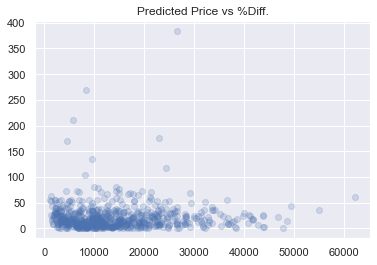

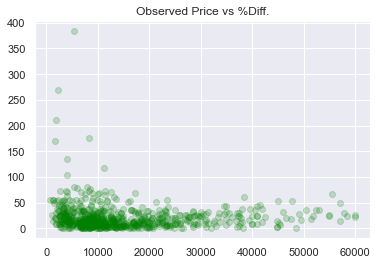

In [41]:
x_predict = result['Predicted']
x_observe = result['Observed']
y_diff = result['%Diff.']

plt.scatter(x_predict, y_diff, alpha = 0.2)
plt.title('Predicted Price vs %Diff.')

plt.show()

plt.scatter(x_observe, y_diff, color = 'green', alpha = 0.2)
plt.title('Observed Price vs %Diff.')

plt.show()